# Biostrap EVO: Guide for Data Extraction and Analysis in Clinical Research


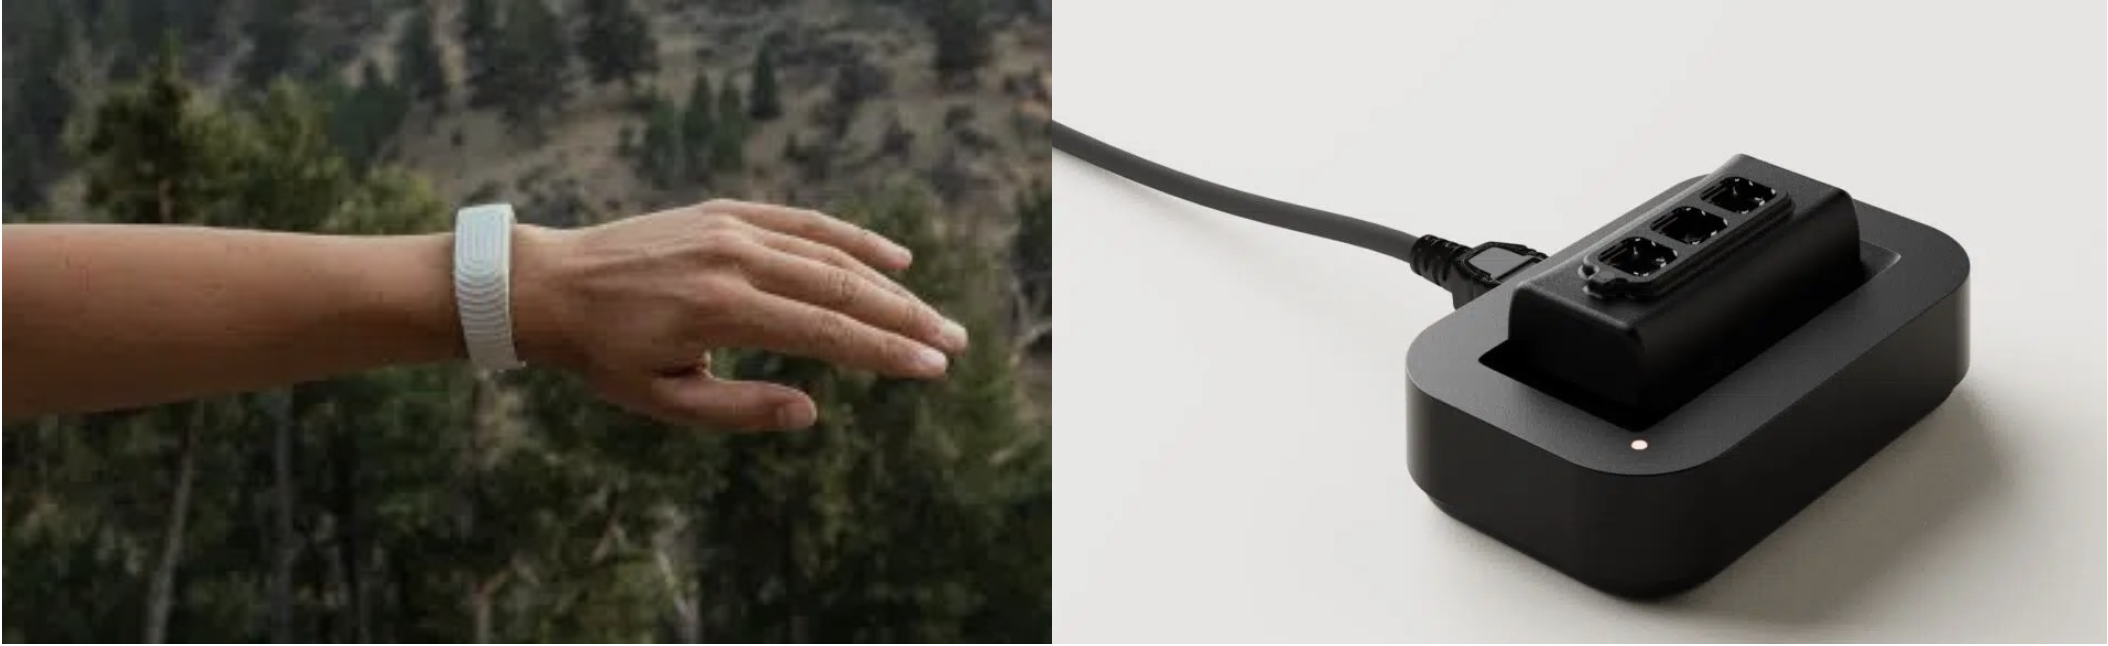
*Left: Biostrap Evo Embedded in a Wrist Strap; Right: A Charging Biostrap Evo Taken Out of Its Strap*

Biostrap EVO is a compact wearable fitness and biometric data tracker. The Biostrap app, available on iOS and Android, offers health insights from the data collected. The device is available in different packages, with pricing ranging from \$175 to \$300. Some additional features, such as an airplane mode to disable Bluetooth LE signal at night and a body temperature sensor, are not currently available but may be added in the future.

If you want to learn more about EVO, see the [Getting Started Guide](https://biostrap.com/getting-started/evo/) for an overview of its key features. More information about the metrics EVO collects can be found in [Biostrap's official API documentation](https://docs.api-beta.biostrap.com).

[Wearipedia](https://www.wearipedia.com/) simplifies the data extraction process from wearable devices. We will import and use the ```wearipedia``` package here.

You can extract the following parameters with known sampling frequencies below:

| Parameter name              | Sampling frequency  |
|-----------------------------|---------------------|
| Workout (activities)        | Per session        |
| Heart rate (bpm)            | 10 seconds          |
| Breaths per minute (brpm)   | 1 minute|
| Heart rate variability (hrv) | 10 seconds |
| Blood oxygen level (SpO2) | 10 seconds |
| Resting calories | 1 day |
| Workout calories | 1 day |
| Active calories | 1 day|
| Step calories | 1 day |
| Total calories | 1 day |
| Sleep movements | Per session |
| Sleep biometrics details | Per session |
| Steps | 1 minute |
| Distance (meters) | 1 minute|

This notebooks covers the following nine topics:

1. Set Up
2. Authentication and Authorization
3. Data Extraction
4. Data Exporting
5. Adherence
6. Visualization
7. Advanced Visualization
8. Outlier Detection and Data Cleaning
9. Data Analysis

**Disclaimer:** This notebook is purely for educational purposes. All of the data currently stored in this notebook is purely synthetic, meaning the data was randomly generated according to rules we created. Despite this, the end-to-end data extraction pipeline has been tested on our own data. This means that if you enter your own authorization credentials, you can visualize your own real data. That being said, the Wearipedia API package is constantly a work in progress; hence, we would appreciate it if you notify us of any bugs, missing extraction features, or incorrect information.

# 1. Set Up



## Study Participant Setup and Usage

### Participant Setup

Dear Participant,

First, download the Biostrap app from your phone's application store ([iOS App Store](https://apps.apple.com/us/app/biostrap/id1187535208) or [Play Store](https://play.google.com/store/apps/details?id=com.wavelethealth.biostrap&hl=en&gl=US&pli=1)) and charge the EVO sensor. Ideally, take the sensor out of its strap and charge it before proceeding. Log in to the app with the following credentials:

Email: ```foo@email.com```

Password: ```whatever_password```

To pair EVO with your phone, follow the on-screen instructions. Wear EVO on your wrist by inserting EVO into its wrist strap. Please make sure you wear EVO for at least 24 hours for meaningful data collection to occur.

Best,

Wearipedia

### Data Receiver Setup

Please follow the below steps:

1. Create an email address for the participant, say, ```foo@email.com```.

2. Create a Biostrap account with the email address ```foo@email.com``` and an appropriate password.

3. Keep ```foo@email.com``` and its password ```whatever_password``` stored somewhere safe.

4. Distribute the device to the participant and instruct them to follow the participant setup letter below.

5. Install the ```wearipedia``` Python package to easily extract data from this device Biostrap API.

To make data available for extraction, you will just need the username and password to generate the API key as illustrated in the sections below. Once an API key is generated, the above login information will no longer be needed on the researcher's side.



In [1]:
!pip install --no-cache-dir git+https://github.com/cheejung/wearipedia.git
!pip install imojify

  Cloning https://github.com/cheejung/wearipedia.git to /tmp/pip-req-build-ogbkyyq1
  Running command git clone --filter=blob:none --quiet https://github.com/cheejung/wearipedia.git /tmp/pip-req-build-ogbkyyq1
  Resolved https://github.com/cheejung/wearipedia.git to commit e2672d165f80ce76398a9499cd2e94f4de316eee
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 153.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 166.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 k

# 2. Authentication and Authorization

To obtain access to data, authentication is required. There are two ways to access the Biostrap API.

* The first option is to create an application with OAuth2 access to the API. The end user for your application must login and give explicit permission to share his or her data.

* The second option is to request access as Biostrap organization. With the organization API token, you can get, create, and list information about your users within the organization.

We will be focusing on the first option. Either way, you need to request API access by contacting developers@biostrap.com.

## Registering an Application

Once Biostrap grants API access, you must register an application while logged in. In the sidebar, select "My Applications" under "Developer Tools." Then, press "Create."



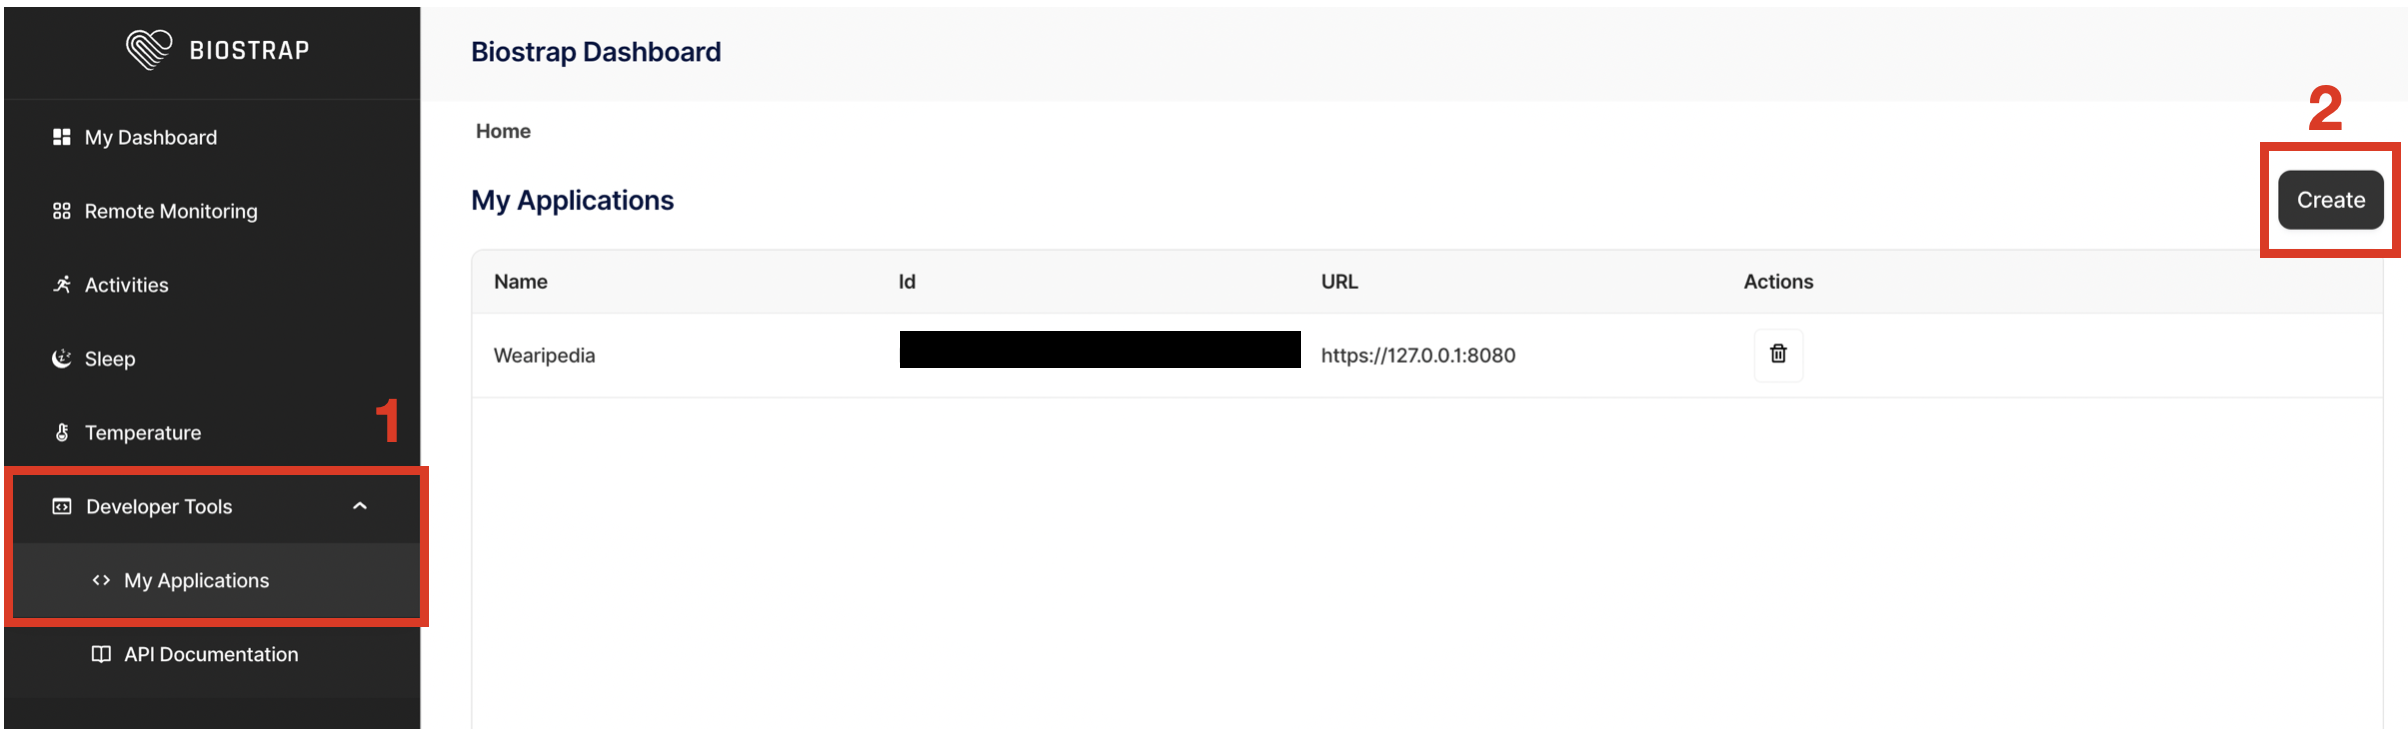

Give a descriptive name for your application and the Redirect URL is the address through which you can receive your token (https://127.0.0.1/, also known as the localhost, is provided as an example, but any link accessible locally should suffice. Note that 8080 is the port). Once everything is filled out, press the button below.


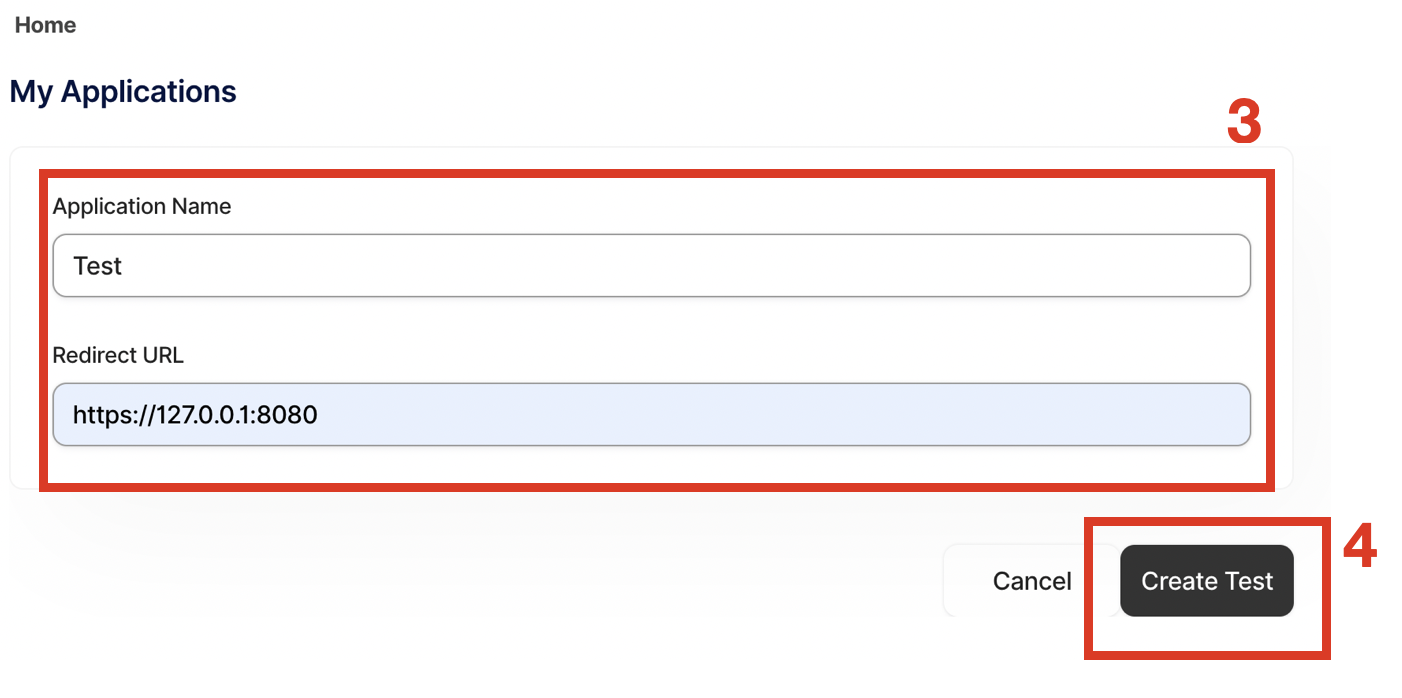

Follow the onscreen instructions. Back in the main menu, you will see the application you just created. You can click on that to retrieve your Client ID and Client Secret.

## Get API Access

### Enter Application Details from Your OAuth2 Application

In [2]:
client_id = 'your-client-id'  #@param {type:"string"}
client_secret = 'your-client-secret'  #@param {type:"string"}

# 3. Data Extraction

We will extract data using ```wearipedia```, our open-source Python package that unifies dozens of complex wearable device APIs into one simple, common interface.

You can set a data range to extract real data from EVO, or press "synthetic" to see some sample data, created purely for our notebook here. We will use synthetic data here for data analysis.

In [3]:
#@title Enter start and end dates (in the format yyyy-mm-dd)

#set start and end dates
start_date='2023-06-05' #@param {type:"string"}
end_date='2023-06-20' #@param {type:"string"}
synthetic = True #@param {type:"boolean"}

In [4]:
import wearipedia

device = wearipedia.get_device("biostrap/evo")

if not synthetic:
    device.authenticate({"client_id": client_id, "client_secret": client_secret})

params = {"start_date": start_date, "end_date": end_date}

activities = device.get_data("activities", params=params)
bpm = device.get_data("bpm", params=params)
brpm = device.get_data("brpm", params=params)
hrv = device.get_data("hrv", params=params)
spo2 = device.get_data("spo2", params=params)
rest_cals = device.get_data("rest_cals", params=params)
work_cals = device.get_data("work_cals", params=params)
active_cals = device.get_data("active_cals", params=params)
step_cals = device.get_data("step_cals", params=params)
total_cals = device.get_data("total_cals", params=params)
sleep_session = device.get_data("sleep_session", params=params)
sleep_detail = device.get_data("sleep_detail", params=params)
steps = device.get_data("steps", params=params)
distance = device.get_data("distance", params=params)

# 4. Data Exporting

In this section, we export all of this data to formats compatible with popular scientific computing software, such as R, Excel, Google Sheets, and MATLAB. Because each parameter is returned in a different format (some return a dictionary of tuples, while some return a more standard dictionary with a string and number as key, value pairs), we group the parameters that are returned in same format. Then, we parse the data into pandas dataframes.

In [5]:
import pandas as pd

# Convert the dictionaries with tuple keys to dataframes
def dict_to_df(dic):
    df = pd.DataFrame(list(dic.items()), columns=['Key', 'Value'])
    df['Date'] = df['Key'].apply(lambda x: x[0])
    df['Time'] = df['Date'].apply(lambda x: x.split(" ")[1])
    df['Date'] = df['Date'].apply(lambda x: x.split(" ")[0])
    df['TZ Offset'] = df['Key'].apply(lambda x: x[1])
    df.drop('Key', axis=1, inplace=True)
    return df

# Convert the dictionaries with string keys to dataframes
def simple_dict_to_df(dic):
    df = pd.DataFrame(list(dic.items()), columns=['Date', 'Value'])
    return df

# Create dataframes for each dictionary
df_bpm = dict_to_df(bpm)
df_hrv = dict_to_df(hrv)
df_spo2 = dict_to_df(spo2)

df_brpm = dict_to_df(brpm)

df_rest_cals = simple_dict_to_df(rest_cals)
df_work_cals = simple_dict_to_df(work_cals)
df_active_cals = simple_dict_to_df(active_cals)
df_step_cals = simple_dict_to_df(step_cals)
df_total_cals = simple_dict_to_df(total_cals)

df_steps = simple_dict_to_df(steps)
df_distance = simple_dict_to_df(distance)

## Exporting to JSON
Specifically, we will first export to JSON, which can be read by R and MATLAB. Then, we will export to CSV format, which can be consumed by Excel, Google Sheets, and every other popular programming language.

In [6]:
import json

# Save dataframes to JSON files
file1_data = {
    'bpm': df_bpm.to_dict(orient='records'),
    'hrv': df_hrv.to_dict(orient='records'),
    'spo2': df_spo2.to_dict(orient='records'),
}

file2_data = {'brpm': df_brpm.to_dict(orient='records')}

file3_data = {
    'rest_cals': df_rest_cals.to_dict(orient='records'),
    'work_cals': df_work_cals.to_dict(orient='records'),
    'active_cals': df_active_cals.to_dict(orient='records'),
    'step_cals': df_step_cals.to_dict(orient='records'),
    'total_cals': df_total_cals.to_dict(orient='records')
}

file4_data = {
    'steps': df_steps.to_dict(orient='records'),
    'distance': df_distance.to_dict(orient='records')
}

json.dump(file1_data, open("data1.json", "w"))
json.dump(file2_data, open("data2.json", "w"))
json.dump(file3_data, open("data3.json", "w"))
json.dump(file4_data, open("data4.json", "w"))

## Exporting to CSV and XLSX
Exporting to CSV/XLSX requires a bit more processing, since they enforce a pretty restrictive schema. We will thus export each data type as separate files. Again, feel free to look at the output files and download them.

In [10]:
# For .csv files

df_bpm.to_csv("bpm.csv", index=False)
df_hrv.to_csv("hrv.csv", index=False)
df_spo2.to_csv("spo2.csv", index=False)
df_brpm.to_csv("brpm.csv", index=False)
df_rest_cals.to_csv("rest_cals.csv", index=False)
df_work_cals.to_csv("work_cals.csv", index=False)
df_active_cals.to_csv("active_cals.csv", index=False)
df_step_cals.to_csv("step_cals.csv", index=False)
df_total_cals.to_csv("total_cals.csv", index=False)
df_steps.to_csv("steps.csv", index=False)
df_distance.to_csv("distance.csv", index=False)

In [7]:
# For .xlsx files

# File 1
with pd.ExcelWriter('data1.xlsx') as writer:
    df_bpm.to_excel(writer, sheet_name='bpm', index=False)
    df_hrv.to_excel(writer, sheet_name='hrv', index=False)
    df_spo2.to_excel(writer, sheet_name='spo2', index=False)

# File 2
df_brpm.to_excel('data2.xlsx', sheet_name='brpm', index=False)

# File 3
with pd.ExcelWriter('data3.xlsx') as writer:
    df_rest_cals.to_excel(writer, sheet_name='rest_cals', index=False)
    df_work_cals.to_excel(writer, sheet_name='work_cals', index=False)
    df_active_cals.to_excel(writer, sheet_name='active_cals', index=False)
    df_step_cals.to_excel(writer, sheet_name='step_cals', index=False)
    df_total_cals.to_excel(writer, sheet_name='total_cals', index=False)

# File 4
with pd.ExcelWriter('data4.xlsx') as writer:
    df_steps.to_excel(writer, sheet_name='steps', index=False)
    df_distance.to_excel(writer, sheet_name='distance', index=False)

# 5. Adherence
In this section, we will simulate non-adherence over longer periods of time from the participant (day-level and week-level).

Then, we will detect this non-adherence and return a Pandas DataFrame that concisely describes when the participant had their device on and off throughout the entirety of the time period.

We will first delete chunks of data, given user input.

In [8]:
#@title Non-adherence simulation
block_level = "day" #@param ["day", "week"]
adherence_percent = 0.57 #@param {type:"slider", min:0, max:1, step:0.01}

In [9]:
import numpy as np

def simulate_non_adherence(bpm, block_level, adherence_percent):
    # Extract unique dates from bpm dictionary keys
    dates = sorted([key[0] for key in bpm.keys()])

    # Determine block_length based on block_level
    block_length = 1 if block_level == "day" else 7

    # Calculate the total number of 10-second intervals in a block
    intervals_per_day = 8640  # 24 hours * 60 minutes * 6 (10-second intervals per minute)
    block_intervals = block_length * intervals_per_day

    # Calculate the number of blocks
    num_blocks = len(dates) // block_intervals

    # Calculate the number of blocks to retain
    num_blocks_to_keep = int(adherence_percent * num_blocks)

    # Randomly select blocks to retain
    idxes = np.random.choice(np.arange(num_blocks), replace=False, size=num_blocks_to_keep)

    # Initialize is_wearing dictionary
    is_wearing = {}

    # Loop through all blocks and set values in is_wearing dictionary
    for i in range(num_blocks):
        start = i * block_intervals
        end = (i + 1) * block_intervals
        wear_value = 1 if i in idxes else 0
        for date in dates[start:end]:
            is_wearing[date] = wear_value

    # For any remaining dates beyond the last full block
    for date in dates[num_blocks * block_intervals:]:
        is_wearing[date] = 0  # We assume not wearing for these remaining dates

    return is_wearing

is_wearing_dict = simulate_non_adherence(bpm, block_level, adherence_percent)

We can now plot this out. Note that 0 indicates non-adherence, while 1 indicates adherence.

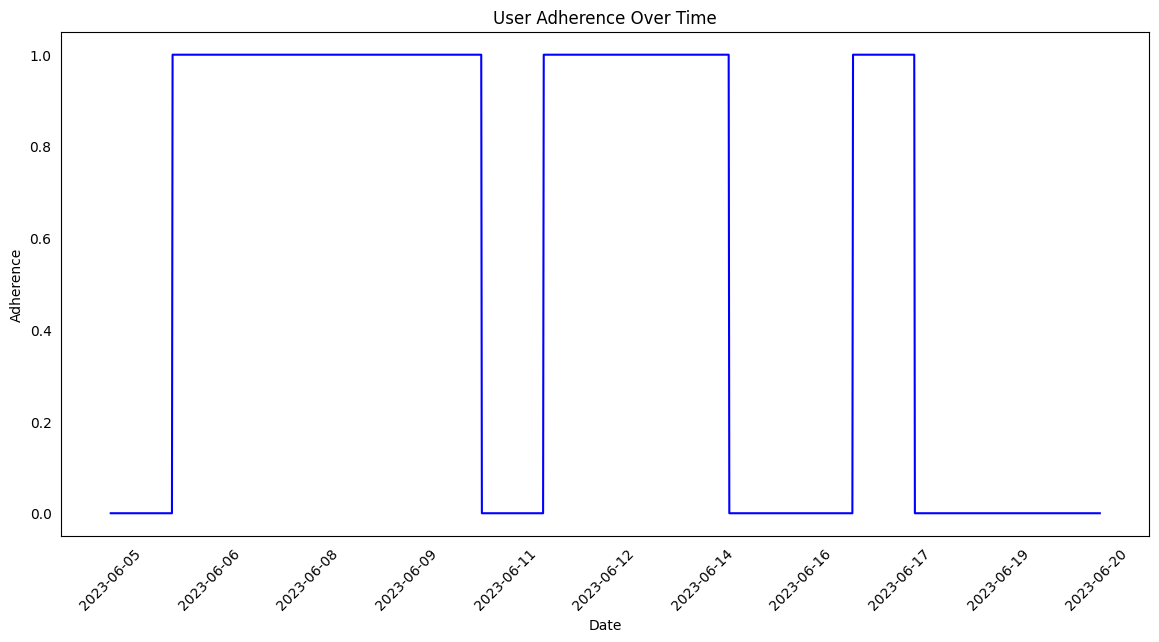

In [11]:
import matplotlib.pyplot as plt

def plot_adherence(is_wearing_dict):
    # Extracting dates and values for plotting
    dates = list(is_wearing_dict.keys())
    values = list(is_wearing_dict.values())

    # Sampling every 15 minutes within a date
    sampled_dates = [date for i, date in enumerate(dates) if i % 90 == 0]  # 15 minutes = 90 intervals of 10 seconds
    sampled_values = [values[i] for i, date in enumerate(dates) if i % 90 == 0]

    plt.figure(figsize=(12, 6))
    plt.plot(sampled_dates, sampled_values, color='blue', linestyle='-')
    plt.title("User Adherence Over Time")
    plt.xlabel("Date")
    plt.ylabel("Adherence")
    plt.tight_layout()
    plt.xticks(rotation=45)

    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

    # Spacing out the x-ticks so they don't overlap
    max_ticks = 10
    spacing = max(1, len(sampled_dates) // max_ticks)  # Ensure spacing is at least 1
    selected_ticks = sampled_dates[::spacing]
    # Display only the date part for x-axis ticks
    plt.xticks(selected_ticks, [tick.split(" ")[0] for tick in selected_ticks])

    plt.grid(False)

    plt.show()

# Plot the final graph with the sampled data
plot_adherence(is_wearing_dict)

# 6. Visualization
We've extracted lots of data, but what does it look like?

In this section, we will be visualizing our three kinds of data in a simple, customizable plot! This plot is intended to provide a starter example for plotting, whereas later examples emphasize deep control and aesthetics.

Note that the timestamps are in UTC. The timezone offset will need to be used to display data in local time.

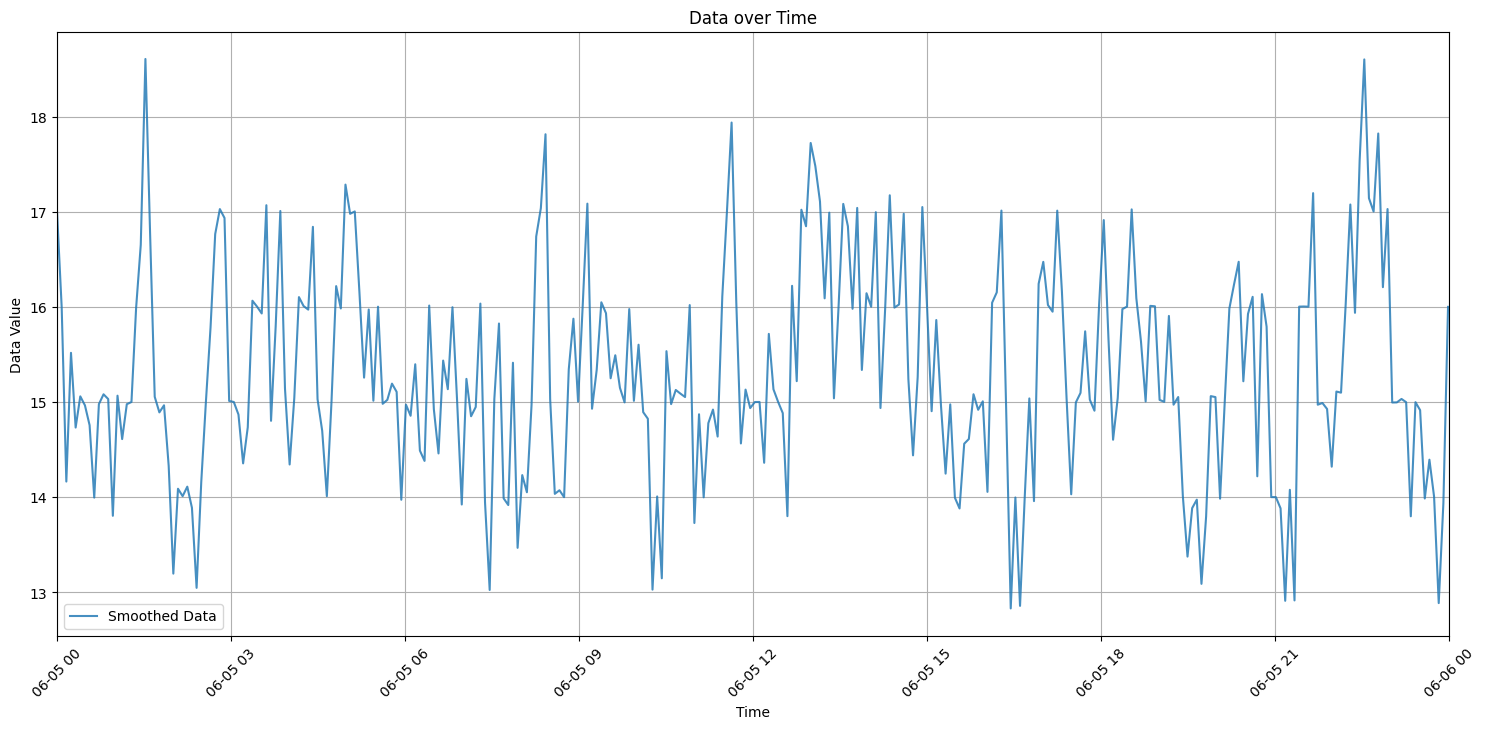

In [12]:
#@title Basic Plot
feature = "brpm" #@param ["brpm", "total_calories", "steps"]
start_from = "2023-06-05" #@param {type:"date"}
time_interval = "one day" #@param ["one day", "one week", "full time"]
smooth_plot = True #@param {type:"boolean"}
smoothness = 0.82 #@param {type:"slider", min:0, max:1, step:0.01}

from datetime import datetime, timedelta
from scipy.interpolate import make_interp_spline

def plot_graph(data, start_from, time_interval, smooth_plot, smoothness, start_data, end_date):
  # Convert to datetime objects for comparison
  start_date_dt = datetime.strptime(start_date, "%Y-%m-%d")
  end_date_dt = datetime.strptime(end_date, "%Y-%m-%d")
  start_from_dt = datetime.strptime(start_from, "%Y-%m-%d")

  # Determine end date based on time_interval
  if time_interval == "one day":
    if feature in ['brpm', 'steps']:
      end_extract_date = start_from_dt + timedelta(days=1, seconds=-1)
    else:
      end_extract_date = start_from_dt
  elif time_interval == "one week":
    if feature in ['brpm', 'steps']:
      end_extract_date = start_from_dt + timedelta(days=6, seconds=-1)
    else:
      end_extract_date = start_from_dt + timedelta(days=6)
  else:  # full time
      end_extract_date = end_date_dt

  # Extract relevant data
  extracted_data = {}
  if feature == 'brpm':
    for key, value in data.items():
      date_str = key[0]
      date_dt = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
      if start_from_dt <= date_dt <= end_extract_date:
        extracted_data[date_dt] = value
  elif feature == 'total_calories':
    for key, value in data.items():
      date_dt = datetime.strptime(key, "%Y-%m-%d")
      if start_from_dt <= date_dt <= end_extract_date:
        extracted_data[date_dt] = value
  else:
    for key, value in data.items():
      date_dt = datetime.strptime(key, "%Y-%m-%d %H:%M:%S")
      if start_from_dt <= date_dt <= end_extract_date:
        extracted_data[date_dt] = value

  # Extract the dates and values for plotting
  dates = list(extracted_data.keys())
  values = list(extracted_data.values())

  plt.figure(figsize=(15, 7))

  # If smooth_plot is True, apply smoothing
  if smooth_plot and len(dates) > 1:  # We need at least 2 data points to smooth
    # Generate more x values for a smoother curve
    xnew = np.linspace(min(dates).timestamp(), max(dates).timestamp(), 300)
    xnew_dates = [datetime.fromtimestamp(ts) for ts in xnew]

    # Create a spline of x and values
    spl = make_interp_spline([date.timestamp() for date in dates], values, k=3)

    # Compute the smoothed y values
    ynew = spl(xnew)

    # Plot the smoothed curve
    plt.plot(xnew_dates, ynew, label="Smoothed Data", alpha=smoothness)
  else:
    plt.plot(dates, values, label="Data")

  if feature in ['brpm', 'steps']:
    # Adjust x-axis limits based on the time_interval
    plt.xlim(start_from_dt, end_extract_date + timedelta(seconds=1))
  else:
    plt.xlim(start_from_dt, end_extract_date + timedelta(days=1))

  plt.xlabel('Time')
  plt.ylabel('Data Value')
  plt.title('Data over Time')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.xticks(rotation=45)
  plt.show()

if feature == 'brpm':
  plot_graph(brpm, start_from, time_interval, smooth_plot, smoothness, start_date, end_date)
elif feature == 'total_calories':
  plot_graph(total_cals, start_from, time_interval, smooth_plot, smoothness, start_date, end_date)
else:
  plot_graph(steps, start_from, time_interval, smooth_plot, smoothness, start_date, end_date)

# 7. Advanced Visualization

Now, we'll do some more advanced plotting for increased aesthetic quality.

## 7.1. Steps Over a Day with Basic Movement Data

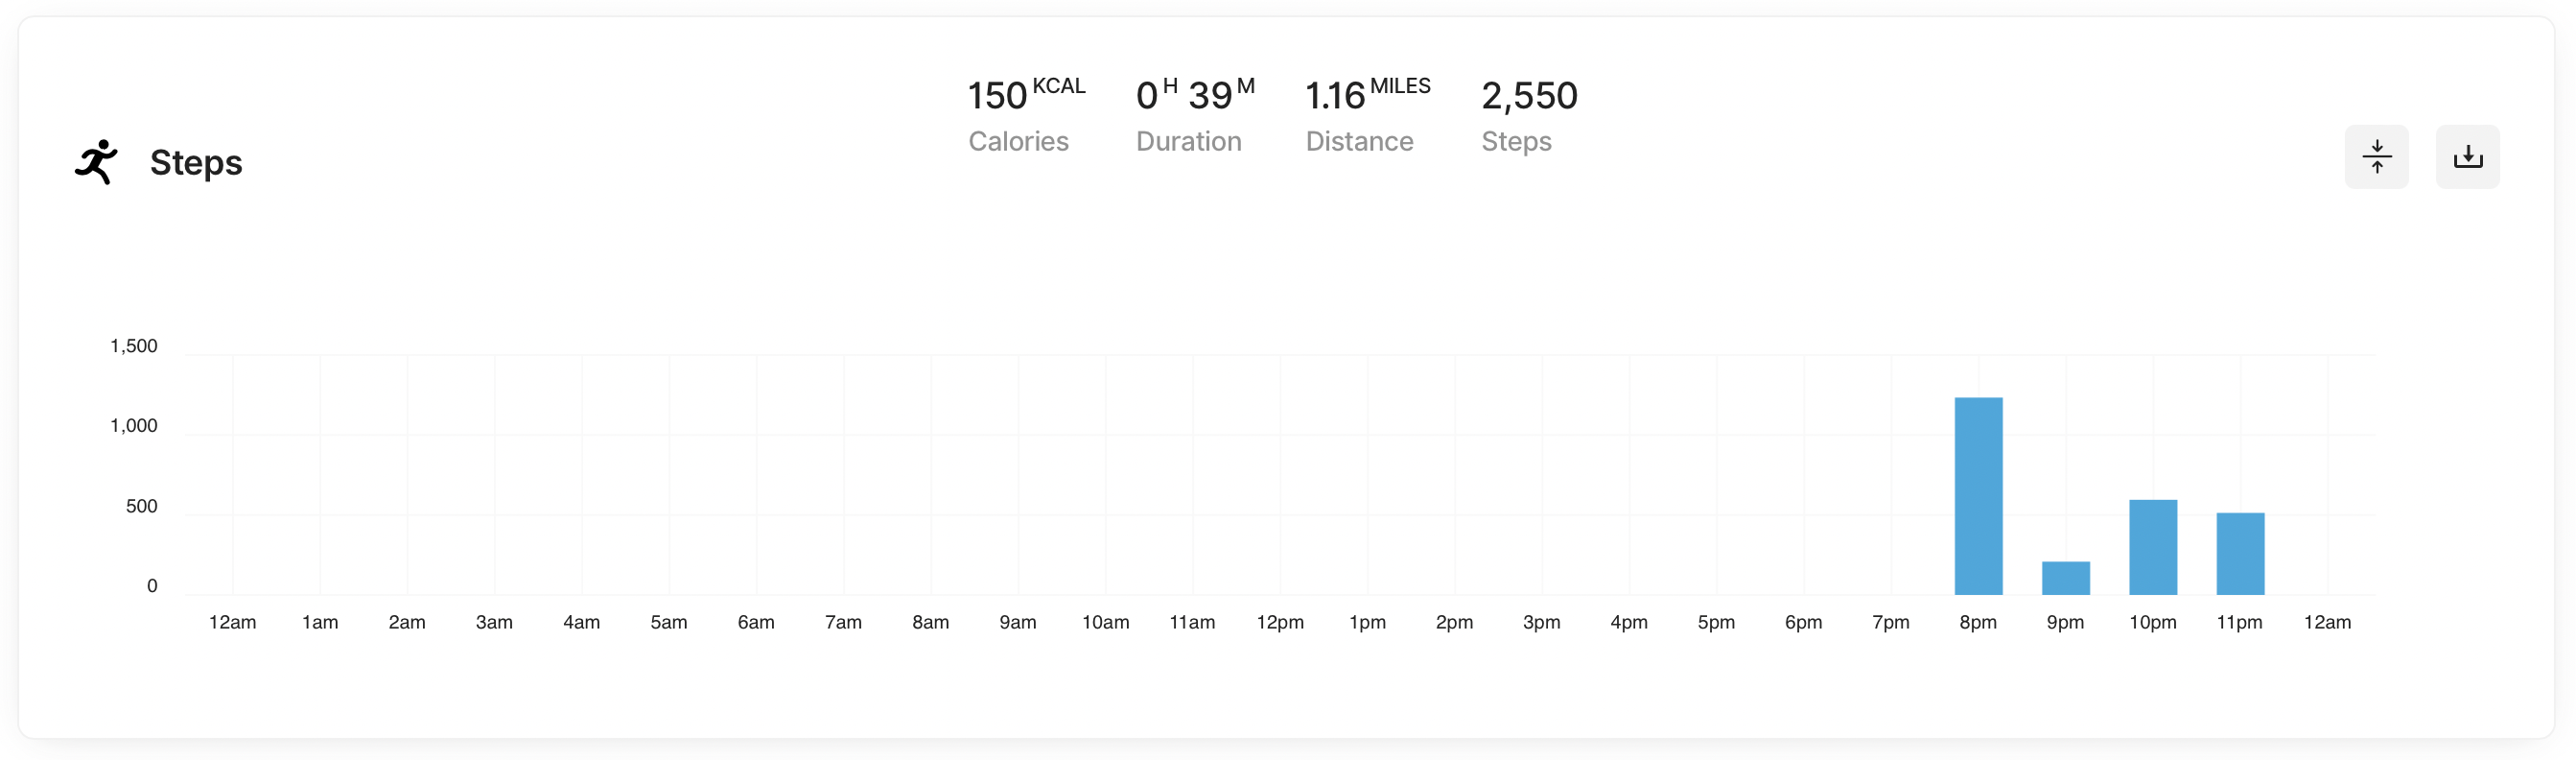

First, let's recreate the above plot to visualize when the user was most active and to understand some basic movement data.

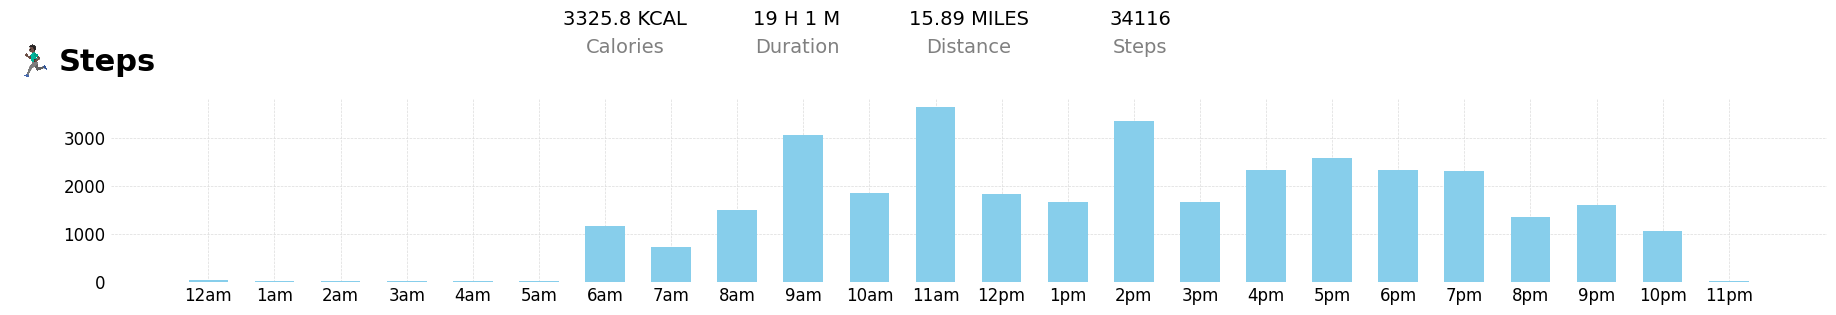

In [13]:
#@title Choose a date to visualize
date_to_visualize = "2023-06-05" #@param {type:"date"}

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from imojify import imojify

def visualize_daily_steps(steps, total_calories, distance, data_to_visualize):
    hourly_steps = [0] * 24
    total_steps = 0
    movement_duration = 0
    total_distance = 0

    # Filter data for the given date
    for timestamp, step in steps.items():
        date, time = timestamp.split(' ')
        if date == data_to_visualize:
            hour = int(time.split(':')[0])
            hourly_steps[hour] += step
            total_steps += step
            if step > 0:
                movement_duration += 1
            total_distance += distance.get(timestamp, 0)

    # Convert total distance to miles
    total_distance *= 0.000621371

    # Convert movement_duration to hours and minutes
    hours_moved = movement_duration // 60
    minutes_moved = movement_duration % 60

    hours = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am',
             '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']

    fig, ax = plt.subplots(figsize=(20, 4))

    # Create the bar chart with sky blue color
    bars = ax.bar(np.arange(len(hours)), hourly_steps, color='skyblue', width=0.6, align='center') # Reduced width

    # Title and labels with customized styles
    title_font = {"fontsize":22, "fontweight":"bold"}
    ax.set_title('Steps', **title_font, loc="left", pad=20, x=-0.03)

    ax.tick_params(axis="both", which="both", labelsize=12, length=0)

    # Customizing grid
    ax.grid(which='both', linestyle='--', linewidth=0.5, color='#dcdcdc')
    ax.set_axisbelow(True)

    # Setting spine visibility
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Display metrics above graph with desired formatting and positioning
    metrics_font_top = {"fontsize":14, "fontweight":"normal", "color":"black"}
    metrics_font_bottom = {"fontsize":14, "fontweight":"normal", "color":"gray"}

    position_shift = 0.3  # Adjust this to shift metrics to the left/right

    ax.text(position_shift, 1.4, f'{total_calories[data_to_visualize]} KCAL', transform=ax.transAxes, ha='center', **metrics_font_top)
    ax.text(position_shift, 1.25, 'Calories', transform=ax.transAxes, ha='center', **metrics_font_bottom)

    ax.text(position_shift + 0.1, 1.4, f'{hours_moved} H {minutes_moved} M', transform=ax.transAxes, ha='center', **metrics_font_top)
    ax.text(position_shift + 0.1, 1.25, 'Duration', transform=ax.transAxes, ha='center', **metrics_font_bottom)

    ax.text(position_shift + 0.2, 1.4, f'{total_distance:.2f} MILES', transform=ax.transAxes, ha='center', **metrics_font_top)
    ax.text(position_shift + 0.2, 1.25, 'Distance', transform=ax.transAxes, ha='center', **metrics_font_bottom)

    ax.text(position_shift + 0.3, 1.4, f'{total_steps}', transform=ax.transAxes, ha='center', **metrics_font_top)
    ax.text(position_shift + 0.3, 1.25, 'Steps', transform=ax.transAxes, ha='center', **metrics_font_bottom)

    # Add running person icon
    running_person_image = plt.imread(imojify.get_img_path('🏃🏿‍♂️'))
    imagebox = OffsetImage(running_person_image, zoom=0.05)
    ab = AnnotationBbox(imagebox, (-0.045, 1.2), frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

    # Adjusting x-axis ticks for visibility
    ax.set_xticks(np.arange(len(hours)))
    ax.set_xticklabels(hours)

    plt.tight_layout()
    plt.show()

visualize_daily_steps(steps, total_cals, distance, date_to_visualize)

# 7.2. Heart Rate Over a Day with Basic Heart Data

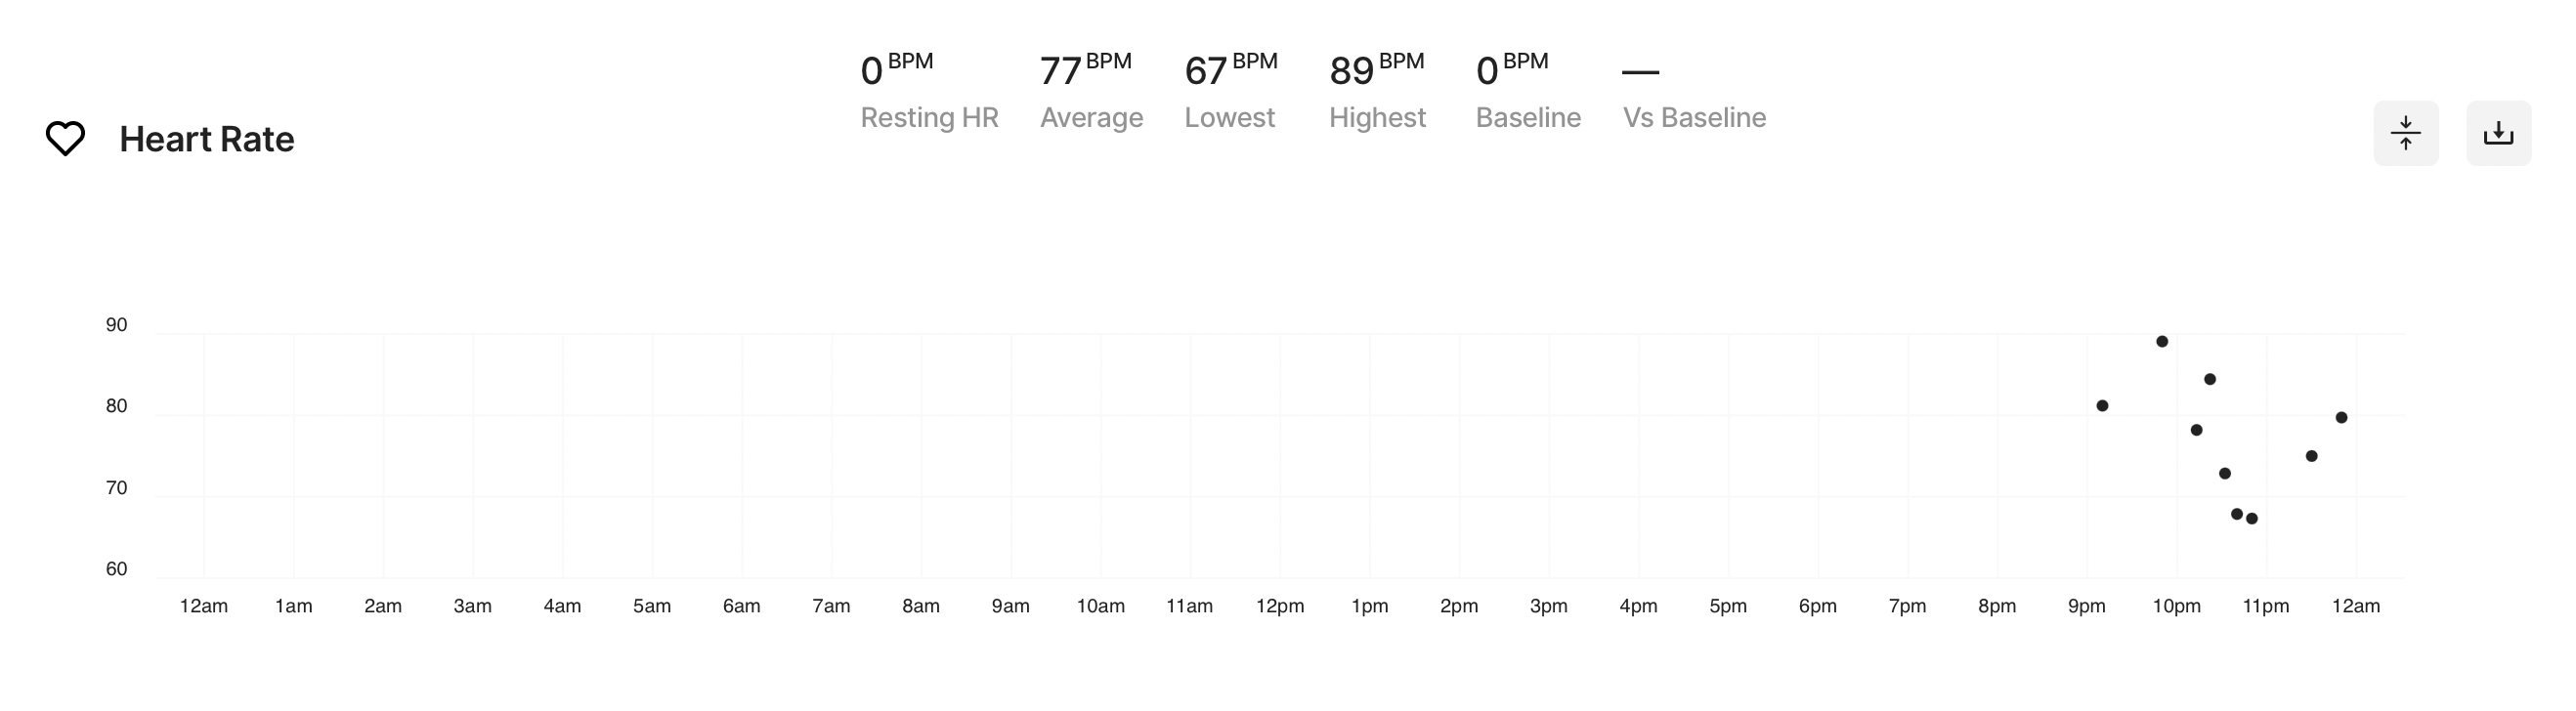


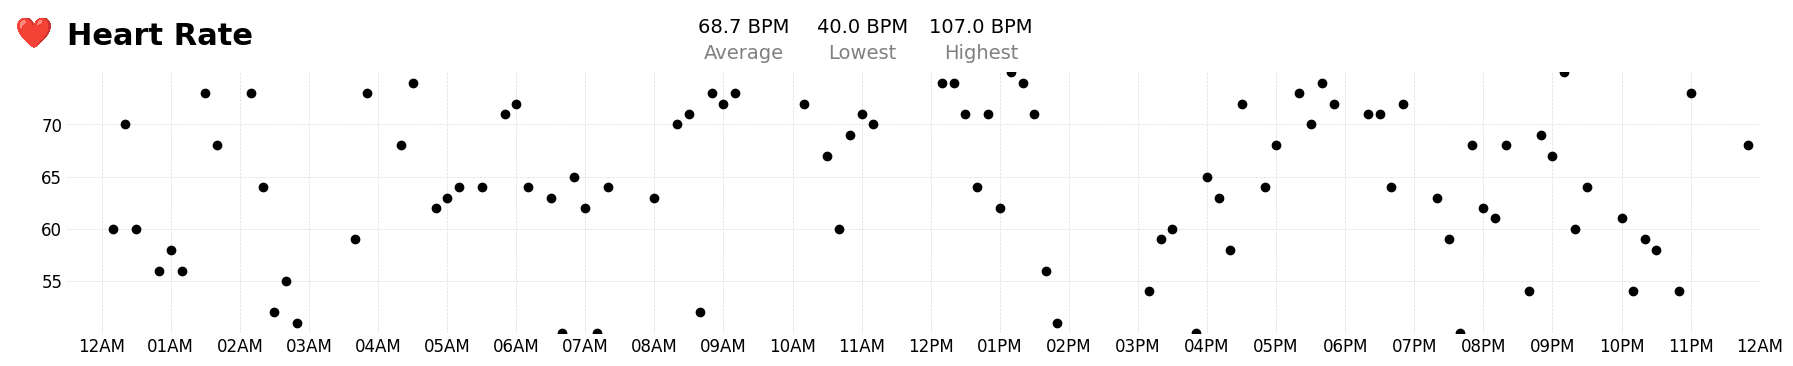

In [14]:
#@title Choose a date to visualize
date_to_visualize = "2023-06-05" #@param {type:"date"}

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np

def visualize_heart_rate(bpm, date_to_visualize):
    # Initialize lists to store the data points
    times = []
    bpm_values = []

    # Filter and downsample the data to every 10 minutes
    for (timestamp_str, tz_offset), value in bpm.items():
        timestamp = datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
        if timestamp.strftime('%Y-%m-%d') == date_to_visualize and timestamp.minute % 10 == 0 and timestamp.second == 0:
            times.append(timestamp)
            bpm_values.append(value)

    # Calculate average, lowest, and highest bpm
    average_bpm = np.mean(bpm_values)
    lowest_bpm = min(bpm_values)
    highest_bpm = max(bpm_values)

    fig, ax = plt.subplots(figsize=(20, 4))

    # Create the scatter plot for bpm
    ax.scatter(times, bpm_values, color='black')

    start_date = datetime.strptime(date_to_visualize, '%Y-%m-%d')
    end_date = start_date + timedelta(days=1)

    # Set the x-axis limits to include some invisible space before the first label
    ax.set_xlim(start_date - timedelta(hours=0.5), end_date)

    # Formatting the date on the x-axis to show hours
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%I%p'))

    # Set y-axis limits and labels
    ax.set_ylim(50, 75)  # Lower the bottom y-axis limit to leave space
    ax.set_yticks(np.arange(55, 75, 5))  # Set y-axis labels starting at 55

    # Customizing the plot with titles, labels, and grid
    title_font = {"fontsize":22, "fontweight":"bold"}
    ax.set_title('Heart Rate', **title_font, loc="left", pad=20)

    ax.tick_params(axis="both", which="both", labelsize=12, length=0)
    ax.grid(which='both', linestyle='--', linewidth=0.5, color='#dcdcdc')
    ax.set_axisbelow(True)

    for spine in ax.spines.values():
        spine.set_visible(False)

    # Display metrics above the graph
    metrics_font_top = {"fontsize":14, "fontweight":"normal", "color":"black"}
    metrics_font_bottom = {"fontsize":14, "fontweight":"normal", "color":"gray"}

    metrics_position = 0.4  # Adjust this to move the metrics horizontally
    label_offset = 0.07     # Distance between labels

    ax.text(metrics_position, 1.15, f'{average_bpm:.1f} BPM', transform=ax.transAxes, ha='center', **metrics_font_top)
    ax.text(metrics_position, 1.05, 'Average', transform=ax.transAxes, ha='center', **metrics_font_bottom)

    ax.text(metrics_position + label_offset, 1.15, f'{lowest_bpm:.1f} BPM', transform=ax.transAxes, ha='center', **metrics_font_top)
    ax.text(metrics_position + label_offset, 1.05, 'Lowest', transform=ax.transAxes, ha='center', **metrics_font_bottom)

    ax.text(metrics_position + 2*label_offset, 1.15, f'{highest_bpm:.1f} BPM', transform=ax.transAxes, ha='center', **metrics_font_top)
    ax.text(metrics_position + 2*label_offset, 1.05, 'Highest', transform=ax.transAxes, ha='center', **metrics_font_bottom)

    # Add heart icon
    heart_image = plt.imread(imojify.get_img_path('❤️'))
    imagebox = OffsetImage(heart_image, zoom=0.05)
    ab = AnnotationBbox(imagebox, (-0.02, 1.15), frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

    plt.tight_layout()
    plt.show()

visualize_heart_rate(bpm, date_to_visualize)

# 8. Outlier Detection

Now, we aim to identify outliers in our dataset.

### *Problem Statement*

Recall that we have a dataset that tracks various parameters continuously, and our task is to identify outliers within the heart rate (BPM) measurements. BPM is reported every 10 seconds, which provides us with a dense dataset to work with. Outliers in BPM can indicate measurement error, anomalies in heart function, or other significant events. Our goal is to find these outliers and understand their implications.

### *Preliminary Data Examination*

Let's first load the dataset.



In [15]:
import pandas as pd

# Load the dataset
bpm_data = pd.read_csv('./bpm.csv')
bpm_data.head()

Value        Date      Time  TZ Offset
0     48  2023-06-05  00:00:00       -420
1     52  2023-06-05  00:00:10       -420
2     52  2023-06-05  00:00:20       -420
3     53  2023-06-05  00:00:30       -420
4     53  2023-06-05  00:00:40       -420

### *Data Cleaning and Preprocessing*

When working with real patient data, before we analyze it for outliers, it's essential to preprocess it. This includes handling missing values, correcting data types, and removing unnecessary columns that are not relevant to our analysis. Since our data is generated synthetically, we safely skip this process.

### *Outlier Detection Strategies*

In data analysis, outliers are observations that deviate significantly from other observations. They can result from variability in the measurement or they could be an indication of experimental errors. For BPM data, outliers might suggest physiological anomalies, data collection errors, or artifacts.

Considering that BPM is sampled every 10 seconds, it's crucial to discern what constitutes an outlier. BPM is subject to fluctuation due to factors like breathing patterns, physical activity, stress levels, and even changes in posture.



#### Unconditional Outlier Detection, $P(\text{BPM})$

This approach involves examining each BPM measurement independently of the others. The objective is to pinpoint data points that are markedly different from the overall distribution of BPM values without accounting for the sequence of time.

#### Techniques for Unconditional Outlier Detection:

1. **Standard Deviation Method**:
   - Assumes BPM values are normally distributed.
   - Values lying more than a specific number of standard deviations from the mean are flagged as outliers.
   - A cutoff between 1 and 4 standard deviations is commonly used.

2. **Interquartile Range (IQR) Method**:
   - Does not assume a normal distribution of data.
   - IQR is calculated between the first quartile (25th percentile) and the third quartile (75th percentile).
   - Data points falling below $\text{Q1} - 1.5\times\text{IQR}$ or above $\text{Q3} + 1.5\times\text{IQR}$ are typically considered outliers.

### *Conditional Outlier Detection*, $P(\text{BPM}_{t}\mid\text{BPM}_{t-1})$

This method evaluates an BPM reading in the context of its preceding value. This is pertinent since BPM is serially correlated; a reading can often predict the following one, especially in short intervals like the 10 seconds in our case.

#### Methods for Conditional Outlier Detection:

1. **Change Detection**:
   - Compute the difference between consecutive BPM readings.
   - Significant deviations from the expected range of fluctuation may indicate outliers.

2. **Time Series Analysis**:
   - Advanced techniques like ARIMA (AutoRegressive Integrated Moving Average) model the time series of BPM to forecast future values.
   - Observations that significantly differ from the model's predictions could be outliers.

### *Assumptions and Calculations*

The selection of a specific outlier detection technique is underpinned by certain assumptions. For instance, the standard deviation method presupposes a normal distribution of BPM values. Whether to adopt a conditional or unconditional method depends on the influence of preceding data points on the current value.

In the case of BPM, considering the sequential nature of the data, conditional methods could be revealing. They are adept at identifying abrupt physiological changes or artifacts that manifest as sudden spikes in BPM.

The mathematics behind conditional outlier detection could involve calculating the change in BPM between successive readings:

$\Delta \text{BPM}_t = \text{BPM}_t - \text{BPM}_{t-1}$

Then, a threshold might be established based on the standard deviation of these changes:

$Threshold = Mean(\Delta \text{BPM}) \pm k \times StdDev(\Delta \text{BPM})$,

where $k$ is a multiplier representing the number of standard deviations to consider.

The rationale is that while BPM can naturally vary from one reading to the next, extreme changes within a brief 10-second interval are unexpected unless there's an atypical event or an error.

### *Conditional Outlier Detection*

Now, let's perform detect conditional outliers.

#### Step 1: Calculate the Differences Between Consecutive Measurements

The ```diff()``` function computes the difference between each BPM value and its predecessor, effectively capturing the change over each 10-second interval. This is the first step in assessing the conditionality of the data.

In [16]:
# Calculate the difference between consecutive BPM measurements
bpm_data['bpm_diff'] = bpm_data['Value'].diff()

#### Step 2: Examine the Distribution of Differences

Before setting thresholds, it's important to understand the distribution of these differences. The histogram provides a visual representation of how BPM changes from one measurement to the next. This helps in determining if the changes are normally distributed, which can guide the choice of threshold for outlier detection.

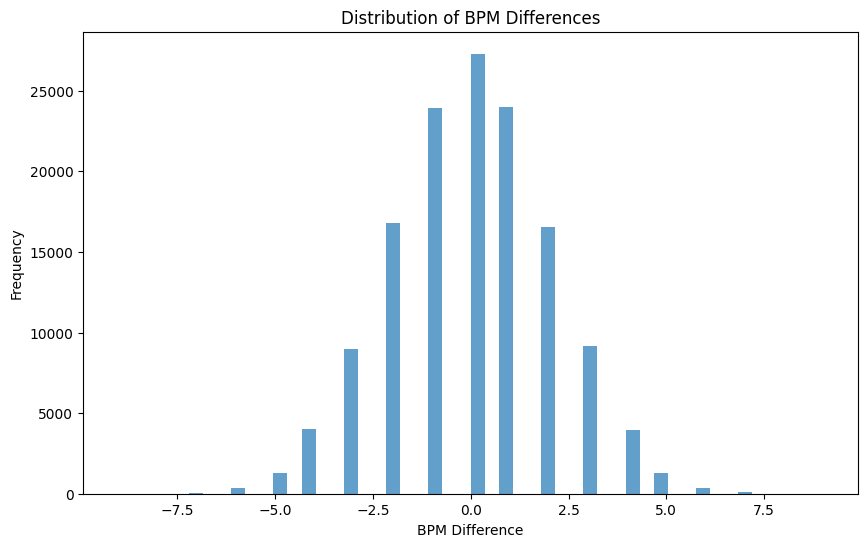

In [17]:
# Plotting the distribution of HRV differences
bpm_diffs = bpm_data['bpm_diff'].dropna()  # Drop NA values resulting from diff()
plt.figure(figsize=(10, 6))
plt.hist(bpm_diffs, bins=50, alpha=0.7)
plt.title('Distribution of BPM Differences')
plt.xlabel('BPM Difference')
plt.ylabel('Frequency')
plt.show()

#### Step 3: Determine a Statistical Threshold

The threshold is determined by multiplying the standard deviation of the BPM differences by a factor to capture the most extreme variations, which are less likely to occur naturally.

In [18]:
# Calculate the standard deviation and mean of the differences
mean_diff = bpm_diffs.mean()
std_diff = bpm_diffs.std()

# Set a threshold for detecting outliers, typically between 1 and 4 standard deviations
threshold = 4 * std_diff

#### Step 4: Identify Conditional Outliers

This step filters the data to find instances where the absolute value of the HRV difference exceeds our threshold, suggesting an unusual and abrupt change in BPM.

In [19]:
# Identify where the difference exceeds the threshold
conditional_outliers = bpm_data[abs(bpm_data['bpm_diff']) > threshold]

#### Step 5: Visualize Outliers

Visualization is crucial as it provides an immediate sense of where outliers occur in the dataset, offering insights into their potential causes and implications.

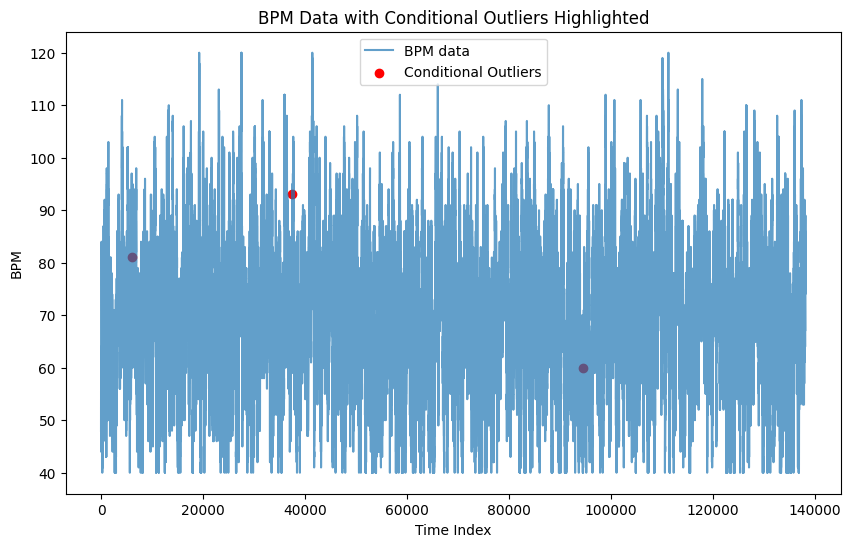

In [20]:
# Plot HRV data with conditional outliers highlighted
plt.figure(figsize=(10, 6))
plt.plot(bpm_data['Value'], label='BPM data', alpha=0.7)
plt.scatter(conditional_outliers.index, conditional_outliers['Value'], color='r', label='Conditional Outliers')
plt.legend()
plt.title('BPM Data with Conditional Outliers Highlighted')
plt.xlabel('Time Index')
plt.ylabel('BPM')
plt.show()

#### Step 6: Interpretation

Consider the context in which these outliers were found. Could they be due to measurement errors, physiological events, or artifacts? Understanding the source can inform how to handle these outliers in analysis and can lead to improvements in data collection or processing methods. Of course, in our case, the data was synthetically generated, so the conditional outliers aren't clinically significant.

# 9. Data Analysis

Data isn't much without some analysis, so we're going to do some in this section. Please do not use the analyses below as evidence supporting any scientific claims. These analyses are purely intended for educational purposes.

**Mini Research Question:** How does the average daily heart rate correlate with the total calories burned in a day?

**Significance:** Understanding the relationship between heart rate and calorie expenditure can provide key insights into metabolic efficiency, cardiovascular health, and the effectiveness of physical activity. For clinical research assistants, this exploration offers a practical application of biometric data to assess health and fitness interventions, tailor exercise programs, and contribute to preventive healthcare strategies.

#### Step 1: Data Loading and Preparation

We first load the bpm (beats per minute) and total calories burned datasets, and prepare them for analysis. Ensuring data quality and alignment is crucial for accurate analysis. Data preparation involves converting dates to a uniform format and aggregating measurements by day.

In [22]:
import pandas as pd

bpm_data_path = './bpm.csv'
total_cals_data_path = './total_cals.csv'

bpm_data = pd.read_csv(bpm_data_path)
total_cals_data = pd.read_csv(total_cals_data_path)

# Convert 'Date' columns to datetime objects
bpm_data['Date'] = pd.to_datetime(bpm_data['Date'])
total_cals_data['Date'] = pd.to_datetime(total_cals_data['Date'])

# Aggregating data to daily averages for BPM and daily totals for Calories
daily_bpm = bpm_data.groupby('Date')['Value'].mean().reset_index()
daily_total_cals = total_cals_data.groupby('Date')['Value'].sum().reset_index()

# Merging the datasets on the 'Date' column
merged_data = pd.merge(daily_bpm, daily_total_cals, on='Date', how='inner')
merged_data.columns = ['Date', 'Average_BPM', 'Total_Calories']

merged_data.head()

Date  Average_BPM  Total_Calories
0 2023-06-05    68.592361         3325.80
1 2023-06-06    70.637616         3363.10
2 2023-06-07    70.947917         3439.30
3 2023-06-08    72.752083         3733.85
4 2023-06-09    72.931597         3878.90

#### Step 2: Descriptive Statistics

We now calculate basic statistical measures (like mean, median, and standard deviation) for both datasets. This provides an overview of the data, helping to understand typical values, variability, and potential outliers.

In [23]:
descriptive_stats_bpm = merged_data['Average_BPM'].describe()
descriptive_stats_calories = merged_data['Total_Calories'].describe()

descriptive_stats_bpm, descriptive_stats_calories

(count    16.000000
 mean     69.938513
 std       2.139398
 min      66.785301
 25%      68.329514
 50%      70.163889
 75%      71.126505
 max      73.213426
 Name: Average_BPM, dtype: float64,
 count      16.000000
 mean     3563.903125
 std       240.134797
 min      3201.800000
 25%      3356.975000
 50%      3578.075000
 75%      3737.837500
 max      4033.950000
 Name: Total_Calories, dtype: float64)

**Average Daily Heart Rate (BPM):**
* Mean: 69.94 bpm
* Standard Deviation: 2.14 bpm
* Range: 66.79 to 73.21 bpm

**Total Daily Calories Burned:**
* Mean: 3563.90 calories
* Standard Deviation: 240.13 calories
* Range: 3201.80 to 4033.95 calories

These statistics provide a foundational understanding of our data. The mean values give us an idea of the typical heart rate and calorie burn, while the standard deviation and range offer insights into the variability within the data.

#### Step 3: Data Visualization

In this step, we create a scatter plot to visualize the relationship between average daily heart rate and total calories burned. A visual representation helps identify patterns, trends, or anomalies in the data, offering an intuitive understanding of the relationship.

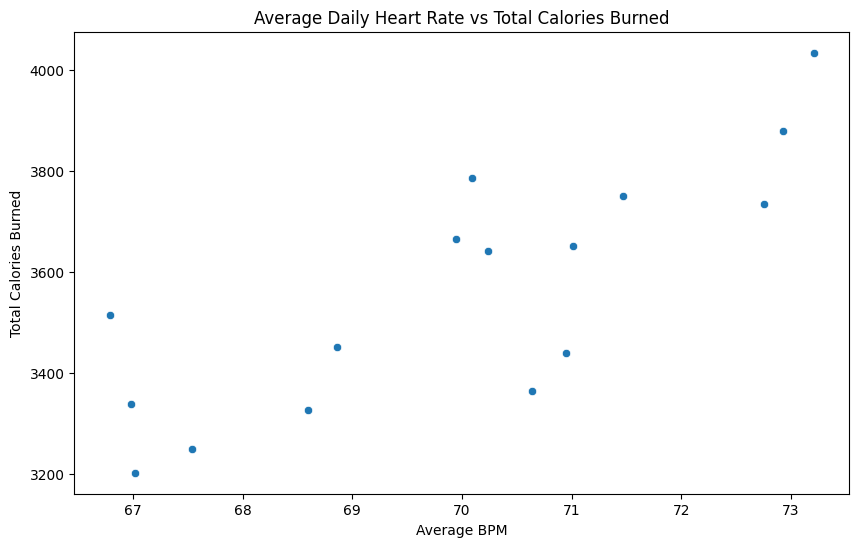

In [25]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Average_BPM', y='Total_Calories')
plt.title('Average Daily Heart Rate vs Total Calories Burned')
plt.xlabel('Average BPM')
plt.ylabel('Total Calories Burned')
plt.show()

A visual inspection suggests a positive relationship, where days with higher average BPM tend to show higher total calories burned.

#### Step 4: Correlation Analysis

Now we compute Pearson and Spearman correlation coefficients, allowing us to quantify the strength and direction of the relationship. Pearson assesses linear relationships, while Spearman is used for non-linear or non-parametric relationships.

In [28]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

pearson_corr, pearson_pval = pearsonr(merged_data['Average_BPM'], merged_data['Total_Calories'])
spearman_corr, spearman_pval = spearmanr(merged_data['Average_BPM'], merged_data['Total_Calories'])

pearson_corr, pearson_pval, spearman_corr, spearman_pval

(0.8051861015557702,
 0.0001676724455532363,
 0.7411764705882353,
 0.0010184695495736751)

**Pearson Correlation Coefficient: 0.8052**
* Interpretation: Strong positive linear relationship between average BPM and total calories burned.
* p-value: 0.0002, indicating statistical significance.

**Spearman Correlation Coefficient: 0.7412**
* Interpretation: Strong positive monotonic relationship.
* p-value: 0.0010, also indicating statistical significance.

These results quantitatively confirm the positive relationship observed in the scatter plot. The low p-values for both tests indicate that the relationship is statistically significant and not likely due to random variation.

#### Step 5: Interpretation

The findings here are not clinically backed up and must be only taken with a grain of salt.

The strong, statistically significant correlation suggests that average BPM is a reliable indicator of total calorie burn. This insight can be valuable for fitness tracking, health monitoring, and designing personalized exercise regimens. Indeed, the high correlation coefficients combined with low p-values underscore the reliability of these findings.

As a recommendation for further reserach, investigating how factors like age, sex, and fitness level influence this relationship could provide deeper insights. Additionally, studying the impact of different types of physical activity on this correlation would be valuable.